In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import yfinance as yf # ticker data 
from pandas_datareader import data as pdr # market proxy and treasury rates data
import datetime as dt
from numpy import nan
from time import sleep
import concurrent.futures
from functools import reduce
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import scipy 
import time
from datetime import datetime, timedelta
import requests

from dateutil.relativedelta import relativedelta
#Will Version monthly 1

In [2]:
#give 10 stocks

tickers = ['AAPL', 'AMZN', 'BAC', 'C', 'IBM', 'GOOG', 'MSFT', 'JPM', 'V', 'WFC']

START_DATE = '2010-12-31'
END_DATE = '2016-12-31'

# Convert START_DATE to a datetime object
start_date_obj = datetime.strptime(START_DATE, '%Y-%m-%d')

# Calculate the previous month's date
previous_month_start_date = (start_date_obj - relativedelta(months=12)).strftime('%Y-%m-%d')#get correlation from past year
#print(previous_month_start_date)


In [3]:

#initial DF
asset_df = yf.download(tickers[0], start=previous_month_start_date, end=END_DATE, progress=False)
asset_df


y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = tickers[0]
df = pd.DataFrame(y)
#df.reset_index(inplace=True)

for x in range(1,10):
    asset_df = yf.download(tickers[x], start=previous_month_start_date, end=END_DATE, progress=False)
    y = asset_df['Adj Close'].resample('M') \
                             .last() \
                             .pct_change() \
                             .dropna()
    y.index = y.index.strftime('%Y-%m')
    y.name = tickers[x]
    ydf = pd.DataFrame(y)
    df = pd.concat([df, ydf], axis=1)


In [304]:

df.reset_index(drop=True, inplace=True)


,AAPL,AMZN,BAC,C,IBM,GOOG,MSFT,JPM,V,WFC
0,-0.088597,-0.067722,0.007968,0.003021,-0.065012,-0.145230,-0.075459,-0.064392,-0.062086,0.053353
1,0.065396,-0.055897,0.097497,0.024096,0.043621,-0.005925,0.022146,0.077812,0.041183,-0.036667
2,0.148470,0.146706,0.072080,0.191177,0.008572,0.076538,0.021626,0.066238,0.067425,0.138258
3,0.111021,0.009796,-0.001121,0.079012,0.005848,-0.073036,0.042676,-0.047427,-0.008789,0.063946
4,-0.016125,-0.084902,-0.117218,-0.093822,-0.024015,-0.076222,-0.151394,-0.070455,-0.195746,-0.132177
...,...,...,...,...,...,...,...,...,...,...
79,0.023652,0.013640,0.119055,0.089705,-0.002290,-0.002263,0.020080,0.055182,0.038314,0.067499
80,0.065504,0.088603,-0.030359,-0.010683,-0.000189,0.013350,0.002437,-0.013481,0.022250,-0.128346
81,0.004334,-0.056717,0.054313,0.040652,-0.032483,0.009327,0.040278,0.047657,-0.002298,0.039069
82,-0.021601,-0.049695,0.284749,0.151099,0.065077,-0.033778,0.012468,0.157523,-0.060930,0.159768


In [235]:
Last_12_months = df.iloc[:12] #get the past 12 months data 

,AAPL,AMZN,BAC,C,IBM,GOOG,MSFT,JPM,V,WFC
0,-0.088597,-0.067722,0.007968,0.003022,-0.065011,-0.145230,-0.075459,-0.064392,-0.062085,0.053353
1,0.065396,-0.055897,0.097497,0.024096,0.043621,-0.005925,0.022146,0.077812,0.041182,-0.036667
2,0.148470,0.146706,0.072080,0.191176,0.008572,0.076538,0.021625,0.066238,0.067425,0.138259
3,0.111022,0.009796,-0.001120,0.079013,0.005848,-0.073036,0.042677,-0.047428,-0.008789,0.063946
4,-0.016125,-0.084902,-0.117218,-0.093821,-0.024015,-0.076222,-0.151394,-0.070456,-0.195746,-0.132177
5,-0.020827,-0.129125,-0.086448,-0.050506,-0.014210,-0.083768,-0.108140,-0.075038,-0.023600,-0.107703
6,0.022741,0.078986,-0.022964,0.090426,0.039845,0.089673,0.121686,0.101751,0.036750,0.083204
7,-0.055005,0.058868,-0.112536,-0.095122,-0.036292,-0.071837,-0.085812,-0.097319,-0.058013,-0.149227
8,0.167214,0.258191,0.052209,0.053908,0.089417,0.168370,0.043460,0.046755,0.076544,0.066666
9,0.060723,0.052018,-0.125954,0.066496,0.070524,0.167196,0.089016,-0.010022,0.052518,0.037420


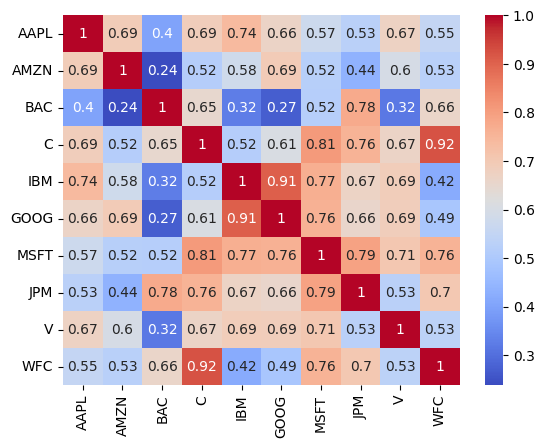

In [236]:

returns_pct=Last_12_months

corr = returns_pct.corr() # calculate the correlations between the returns of each pair of stocks
sns.heatmap(corr,annot=True,cmap="coolwarm")
df = pd.DataFrame(corr)
titles = df.columns.tolist()

Connected Graph Found


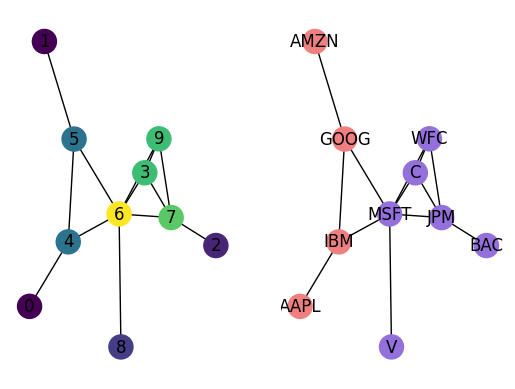

In [237]:
def truncate(f,relaxer=.99): 
    if (abs(f) < relaxer):
        return 0
    else:
        return 1
relaxer=.9999
truncated=corr.applymap(truncate)
# we already know that every stock is perfectly correlated with itself, so the ones on the diagonal are not really useful information. Let's get rid of them.
adj = truncated- np.identity(10)
stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix

while nx.is_connected(stocknet)==False:
    relaxer=relaxer-.0001
    truncated=corr.applymap(truncate)
    adj = corr.applymap(lambda x: truncate(x, relaxer=relaxer))- np.identity(10)
    stocknet = nx.from_numpy_array(adj.to_numpy()) # initialize a new graph from our adjacency matrix
else:
    print("Connected Graph Found")
    #print(relaxer)

IndexedStocknet=stocknet
Indexedstock_layout = nx.spring_layout(IndexedStocknet,seed=10)
stocknet = nx.relabel_nodes(stocknet, dict(enumerate(adj.columns))) # keep the stock tickers as the names of the nodes (instead of integers)
stock_layout = nx.spring_layout(stocknet,seed=10) # fix our layout
L = nx.laplacian_matrix(stocknet).todense()
(u,v) = np.linalg.eig(L)
u_sorted = np.sort(u)
v_sorted = v[:, u.argsort()]
colors = [ "lightcoral" for i in range(0,10) ]
for i in range(0,10):
    if (v_sorted[i,1] < 0):
        colors[i] = "mediumpurple"


eigen_cent = nx.eigenvector_centrality(IndexedStocknet)
eigen_colors = [eigen_cent[i] for i in range(0,10)]
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Draw the graphs in the subplots
nx.draw(IndexedStocknet,Indexedstock_layout,node_color=eigen_colors,with_labels=True,ax=ax1)
nx.draw(stocknet,stock_layout,node_color=colors,with_labels=True,ax=ax2)

plt.show()

In [301]:

df = pd.DataFrame(eigen_cent,index=[0])
dfT= pd.DataFrame(titles)
# print the resulting DataFrame
mat1=df.T
mat2=dfT

joined_mat = pd.concat([mat1, mat2], axis=1)
df=joined_mat
# print the resulting joined matrix
joined_mat.head()
df.columns = ['centrality', 'stock']
df = df.iloc[:, [1, 0]]
df = df.sort_values('centrality',ascending=False)
df=df.reset_index(drop=True)
centralitydf=df

print(centralitydf)

  stock  centrality
0  MSFT    0.553891
1   JPM    0.430317
2     C    0.402242
3   WFC    0.402242
4   IBM    0.256828
5  GOOG    0.256828
6     V    0.160697
7   BAC    0.124845
8  AAPL    0.074512
9  AMZN    0.074512


In [299]:

# Create a date range from START_DATE to END_DATE with a monthly frequency
date_range = pd.date_range(start=START_DATE, end=END_DATE, freq='M')

# Create an empty DataFrame with the date_range as the index
df = pd.DataFrame(index=date_range)

# Specify the stocks
stocks = centralitydf['stock']

# Create columns for each stock and initialize them with NaN values
for stock in stocks:
    df[stock] = pd.Series(dtype=float)

first_row_data = centralitydf['centrality'].tolist()

df.loc[date_range[0]] = first_row_data


df

,MSFT,JPM,C,WFC,IBM,GOOG,V,BAC,AAPL,AMZN
2010-12-31,0.553891,0.430317,0.402242,0.402242,0.256828,0.256828,0.160697,0.124845,0.074512,0.074512
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
